In [ ]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from torch.nn.utils.rnn import pack_sequence
import numpy as np

In [ ]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00348/MovementAAL.zip

--2020-04-07 12:19:51--  https://archive.ics.uci.edu/ml/machine-learning-databases/00348/MovementAAL.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
ERROR: cannot verify archive.ics.uci.edu's certificate, issued by ‘CN=InCommon RSA Server CA,OU=InCommon,O=Internet2,L=Ann Arbor,ST=MI,C=US’:
  Issued certificate has expired.
To connect to archive.ics.uci.edu insecurely, use `--no-check-certificate'.


In [ ]:
!unzip MovementAAL.zip 

Archive:  MovementAAL.zip
   creating: MovementAAL/
  inflating: MovementAAL/dataset_description.txt  
  inflating: MovementAAL/MovementAAL.jpg  
  inflating: MovementAAL/README.txt  
   creating: MovementAAL/dataset/
  inflating: MovementAAL/dataset/MovementAAL_RSS_1.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_10.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_100.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_101.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_102.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_103.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_104.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_105.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_106.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_107.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_108.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_109.csv  
  inflating: MovementAAL/dataset/MovementAAL_RSS_11.csv  
  inflating: Moveme

In [ ]:
sequences = [torch.tensor(pd.read_csv("MovementAAL/dataset/MovementAAL_RSS_"+str(i)+".csv").values) for i in range(1,315)]

In [ ]:
len(sequences)

314

In [ ]:
targets = torch.tensor(pd.read_csv("MovementAAL/dataset/MovementAAL_target.csv").values)[:,1]

In [ ]:
seq_sizes = []
for one_seq in sequences:
  seq_sizes.append(one_seq.size()[0])


In [ ]:
sequences[5][-1].size()

torch.Size([4])

In [ ]:
new_seq = []
for one_seq in sequences:
  n = 129 - one_seq.size()[0]
  last_= one_seq[-1]
  temp = last_.repeat(n,1)
  new_ = torch.cat((one_seq,temp))
  new_ = new_.unsqueeze(0).permute(1,0,2)
  new_seq.append(new_)
  

In [ ]:
len(new_seq)


314

In [ ]:
for one_seq in new_seq:
  print(one_seq.size())

torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129, 1, 4])
torch.Size([129,

In [ ]:
acc_tens = torch.stack(new_seq,dim = 1).squeeze()
print(acc_tens.size())
new_seq_1 = acc_tens

torch.Size([129, 314, 4])


In [ ]:
x_train = new_seq_1[:,0:157,:]
x_test = new_seq_1[:,157:314,:]

y_train = targets[0:157]
y_test = targets[157:314]

#x_train = pack_sequence(x_train)
#y_train = pack_sequence(y_train)

#x_test = pack_sequence(x_test)
#y_test = pack_sequence(y_test)

In [ ]:
for i in range(0,157):
  if y_train[i] == -1:
    y_train[i] = 0

for t in range(0,157):
  if y_test[t] == -1:
    y_test[t] = 0


In [ ]:
y_test

tensor([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
y_train.size()

torch.Size([157])

In [ ]:
x_test.size()
print(type(x_train))
print(type(torch.randn(5, 3, 10)))

<class 'torch.Tensor'>
<class 'torch.Tensor'>


In [ ]:
class LSTM(nn.Module):
  def __init__(self,input_size ,hidden_size,num_layers,batch_size,bias):
    super(LSTM, self).__init__()
    self.input_size = input_size
    self.hidden_size = hidden_size
    self.num_layers = num_layers
    self.bias = bias
    self.batch_size = batch_size

    self.lstm = nn.LSTM(self.input_size,self.hidden_size,self.num_layers,bias,dropout = 0.8)
    self.logsoftmax = torch.nn.LogSoftmax(dim=None)

  def forward(self,x):
    h0 = torch.zeros(self.num_layers,self.batch_size,self.hidden_size)
    c0 = torch.zeros(self.num_layers,self.batch_size,self.hidden_size)
    lstm_out,(hn,cn) = self.lstm(x.float(),(h0, c0))
    y_pred = self.logsoftmax(lstm_out[-1,:,:])
    return y_pred


In [ ]:
model = LSTM(4,2,2,157,bias= True)
#y_pred = model(x_train)
#print(type(y_pred))

criterion = torch.nn.NLLLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=1e-3)

In [ ]:
hist = np.zeros(3001)
 
for t in range(3001):
    # Clear stored gradient
    model.zero_grad()

    # Forward pass
    y_pred = model(x_train)
 
    loss_ = criterion(y_pred, y_train)
    if t % 100 == 0:
        print("Epoch ", t, "NLL: ", loss_.item())
        print(y_pred.size())
    hist[t] = loss_.item()
 
    # Zero out gradient, else they will accumulate between epochs
    optimiser.zero_grad()
 
    # Backward pass
    loss_.backward()
 
    # Update parameters
    optimiser.step()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Epoch  0 NLL:  0.7039210200309753
torch.Size([157, 2])
Epoch  100 NLL:  0.6896592378616333
torch.Size([157, 2])
Epoch  200 NLL:  0.689054548740387
torch.Size([157, 2])
Epoch  300 NLL:  0.6234197020530701
torch.Size([157, 2])
Epoch  400 NLL:  0.5892671942710876
torch.Size([157, 2])
Epoch  500 NLL:  0.5743503570556641
torch.Size([157, 2])
Epoch  600 NLL:  0.561551570892334
torch.Size([157, 2])
Epoch  700 NLL:  0.5545893311500549
torch.Size([157, 2])
Epoch  800 NLL:  0.5537806749343872
torch.Size([157, 2])
Epoch  900 NLL:  0.5504425168037415
torch.Size([157, 2])
Epoch  1000 NLL:  0.547206699848175
torch.Size([157, 2])
Epoch  1100 NLL:  0.555724024772644
torch.Size([157, 2])
Epoch  1200 NLL:  0.5667799711227417
torch.Size([157, 2])
Epoch  1300 NLL:  0.5375229120254517
torch.Size([157, 2])
Epoch  1400 NLL:  0.542266309261322
torch.Size([157, 2])
Epoch  1500 NLL:  0.5530688166618347
torch.Size([157, 2])
Epoch  1600 NLL:  0.5238156318664551
torch.Size([157, 2])
Epoch  1700 NLL:  0.53550314903

In [ ]:
a = np.arange(3001)

In [ ]:
a.shape

(3001,)

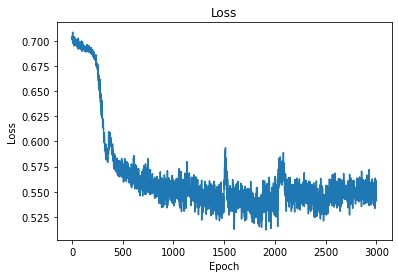

In [ ]:
plt.plot(a,hist)
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.savefig('foo.png')

In [ ]:
# Test the model
model.eval()
with torch.no_grad():
    correct = 0
    total = 0
    y_t_pred = model(x_test)
    _, predicted = torch.max(y_t_pred.data, 1)
    for i in range(157):
      if predicted[i] == y_test[i]:
        correct = correct+1
      total = total+1
    print('Test Accuracy of the model on the 157 test data: {} %'.format(100 * correct / total))

Test Accuracy of the model on the 157 test data: 50.955414012738856 %


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
